In [48]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.linear_model import LinearRegression

In [21]:
img = cv2.imread('3660.20-3660.95_01011.bmp')

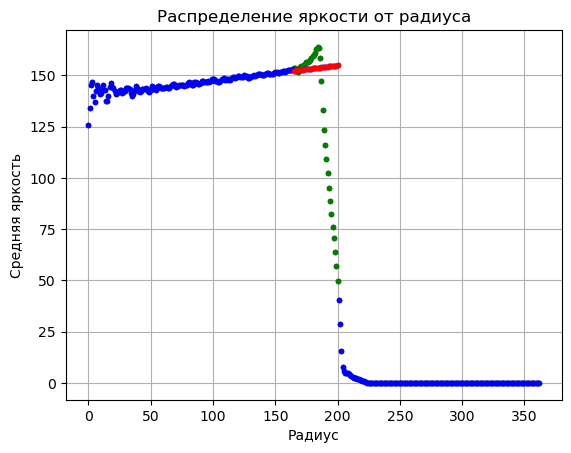

In [100]:
# Рассчитываем расстояние каждого пикселя до центра изображенияh,
w, h = img.shape[:2]
center = (w // 2, h // 2)
y, x = np.indices((h, w))
radii = np.sqrt((x - center[0])**2 + (y - center[1])**2)
# Рассчитываем среднюю яркость для каждого радиуса
unique_radii = np.unique(radii.astype(int))
# brightness = []
brightness = np.zeros(unique_radii.shape)
for i, radius in enumerate(unique_radii):
    mask = radii.astype(int) == radius
    average_brightness = np.mean(img[mask])
    # brightness.append(average_brightness)
    brightness[i] = average_brightness
# Построение графика распределения яркости от радиуса
plt.plot(unique_radii, brightness, '.', color='black')
plt.xlabel('Радиус')
plt.ylabel('Средняя яркость')
plt.title('Распределение яркости от радиуса')

ind_start = 165
ind_end = 201
plt.plot(unique_radii[ind_start:ind_end], brightness[ind_start:ind_end], 'g.')
X_train = unique_radii[0:ind_start].reshape((-1,1))
y_train = brightness[0:ind_start]
model = LinearRegression().fit(X_train, y_train)
x_pred = unique_radii[ind_start:ind_end].reshape((-1,1))
y_pred = model.predict(x_pred)

y_tail = brightness[ind_end:]
y_final = np.hstack((y_train, y_pred, y_tail))

plt.plot(unique_radii, y_final, 'b.')
plt.plot(x_pred, y_pred, 'r.')

plt.grid()
plt.show()

In [68]:
y_train.shape

(166,)

In [69]:
y_pred.shape

(35,)

In [75]:
y_final.shape

(363,)

In [84]:
unique_radii.shape

(363,)